<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Laboratorio 1

En esta notebook presentamos lo analizado en funcion de la consigna del laboratorio 1

In [1]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import scipy.stats

In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

## Empecemos...
Cargamos el dataset propuesto

In [3]:
pd_rpns = pd.read_csv('responses.csv',encoding='utf8')
# acomodemos los nombres, los llevamos a lowercase y separamos con _
import re
n=[re.sub('-[\s]','',x.lower(),count=20) for x in pd_rpns.columns]
n1=[re.sub('\s','_',x.strip()) for x in n]
pd_rpns.columns=n1;        

In [4]:
pd_rpns.head(5)

,music,slow_songs_or_fast_songs,dance,folk,country,classical_music,musical,pop,rock,metal_or_hardrock,...,age,height,weight,number_of_siblings,gender,left_right_handed,education,only_child,village_town,house_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


### Estadísticas descriptivas
Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?

### Peso

In [5]:
# De: https://github.com/pandas-dev/pandas/issues/7014
# Lo utilizamos para incoporar la moda y tener todo el set junto (moda, mediana=quantil(50%), std)
def series_describe(self):
    # requires pandas
    """ describe  of a series """
    l = [ ('nobs'  , len(self.index)),
          ('valid' , self.count()   ),
          ('mode'  , self.mode().values), # https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html
          ('mean'  , self.mean()    ),
          ('median', self.median()),
          ('min'   , self.min()     ),
          ('max'   , self.max()     ),
          ('std'   , self.std()     ),
          ('10%'   , self.quantile(0.10)),
          ('25%'   , self.quantile(0.25)),
          ('50%'   , self.median()  ),
          ('75%'   , self.quantile(0.75)),
          ('90%'   , self.quantile(0.90)),
          ('skew'  , self.skew()    ),
          ('kurt'  , self.kurt()    ) ]
    s = pd.Series(dict(l), index = [ k for k, v in l ])
    s[s.abs()<0.000001] = 0.0
    return s


In [6]:
var_of_int='weight';
bins_def=20;
# Entonces para el Peso
series_describe(pd_rpns[var_of_int])

nobs         1010
valid         990
mode       [60.0]
mean      66.4051
median         64
min            41
max           165
std       13.8396
10%            50
25%            55
50%            64
75%            75
90%            84
skew      1.22373
kurt      3.96932
dtype: object

In [7]:
# Veamos si se parece a alguna distribucion
# Seguimos https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
#dist_names = ['gamma', 'rayleigh', 'pareto','beta', 'norm']

def plt_hist(y,bins_val,xlabel,ylabel,figsize_num,dist_names):
    hist_par={};
    dist_par={};
    fig=plt.figure(figsize=figsize_num)
    N, bins, patches = plt.hist(y, bins=bins_val,normed=True)
    hist_par['N']=N;
    hist_par['bins']=bins;
    hist_par['patches']=patches
    x = bins;
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(y)
        print(dist_name)
        print(param)
        pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
        dist_par['dist_name']={'param':param,'pdf_fitted':pdf_fitted}
        plt.plot(x,pdf_fitted, label=dist_name)
    plt.legend(loc='upper right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    return fig,hist_par,dist_par


gamma
(3.821094679225772, 39.51775555140077, 7.036538242407757)
rayleigh
(40.807320186879, 20.574122714031674)
norm
(66.40505050505051, 13.832569338065822)


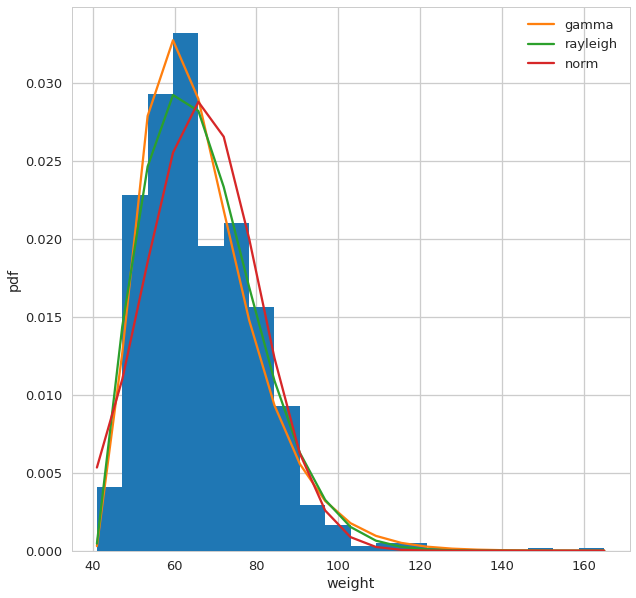

In [8]:
# Veamos algunas graficas
var_of_int='weight';
y = pd_rpns[var_of_int].dropna()
plt_hist(y,bins_def,var_of_int,'pdf',(10,10),['gamma', 'rayleigh','norm']);

*De las graficas podemos ver que la distribucion es similar al histograma de muestras seria la correspondiente a la distribucion **gamma**. El comentario anterior corresponde a los valores sin la remocion de outliers. Estos podrian generar (debido a su presencia) cierta asimetria en la distribucion.* 

### Edad

In [9]:
# Entonces para la edad
var_of_int='age';
series_describe(pd_rpns[var_of_int])

nobs         1010
valid        1003
mode       [19.0]
mean      20.4337
median         20
min            15
max            30
std       2.82884
10%            18
25%            19
50%            20
75%            22
90%            24
skew      1.14874
kurt      1.57887
dtype: object

gamma
(6.239750551997464, 13.588562055759816, 1.0970217533422177)
rayleigh
(14.818578916576575, 4.445474092159431)
norm
(20.43369890329013, 2.8274295576298125)


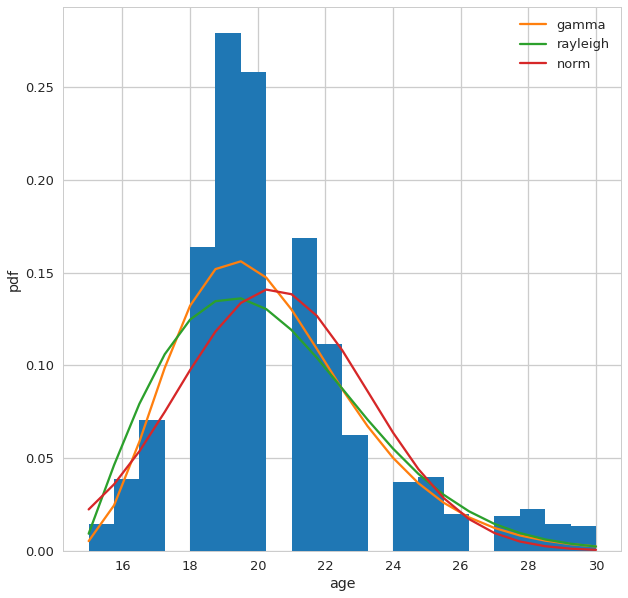

In [10]:
var_of_int='age';
y = pd_rpns[var_of_int].dropna()
plt_hist(y,bins_def,var_of_int,'pdf',(10,10),['gamma', 'rayleigh','norm']);

*De las graficas no queda claro que una distribucion se aproxime en forma determinada a las muestras. En relacion a lo observado, se puede ver que la serie de valores parece tener un valor central con una "cola larga". En este sentido se podria argumentar que la distribucion gamma o una beta serian funcionalmente parecidas, pero su punto central no se encuentra bien magnificado en el ajuste.*

### Outliers

Realizar un análisis de outliers.

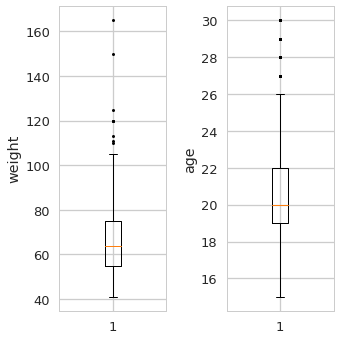

In [11]:
var_of_int='weight'
#pd_rpns[var_of_int][~np.isnan(pd_rpns[var_of_int])]=pd_rpns[var_of_int].dropna()
# Utilizamos un boxplot para realizar el analisis de outliers
#NOTA:https://stackoverflow.com/questions/28908003/matplotlib-box-plot-fliers-not-showing
#issues al importar seaborn y matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,5))
ax[0].boxplot(pd_rpns[var_of_int].dropna(),sym='k.');
ax[0].set_ylabel(var_of_int)
var_of_int='age'
ax[1].boxplot(pd_rpns[var_of_int].dropna(),sym='k.');
ax[1].set_ylabel(var_of_int)
plt.tight_layout()

In [12]:
# Mejor veamos el boxplot sobre el histograma
# src: https://stackoverflow.com/questions/12127635/matplotlib-can-we-draw-a-histogram-and-a-box-plot-on-a-same-chart

def box_on_hist(x,bins_val,xlabel,ylabel,figsize_num,normed_val):
    fig = plt.figure(figsize=figsize_num)
    bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                                # (adjust as necessary)
    histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                                # bottom + height on this line should
                                                # equal bottom on bpAx line
    # plot stuff
    bp = bpAx.boxplot(x, sym='k.', vert=False)
    h = histAx.hist(x, bins=bins_val,normed=normed_val)

    # confirm that the axes line up 
    xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
    for ax in [bpAx, histAx]:
        ax.set_xlim([xlims.min(), xlims.max()])

    bpAx.set_xticklabels([])  # clear out overlapping xlabels
    bpAx.set_yticks([])  # don't need that 1 tick mark
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return bp

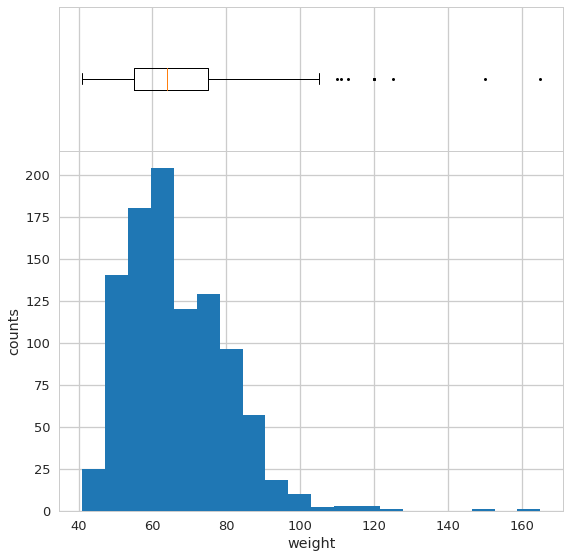

In [13]:
var_of_int='weight'
box_on_hist(pd_rpns[var_of_int].dropna(),bins_def,var_of_int,'counts',(10,10),False);

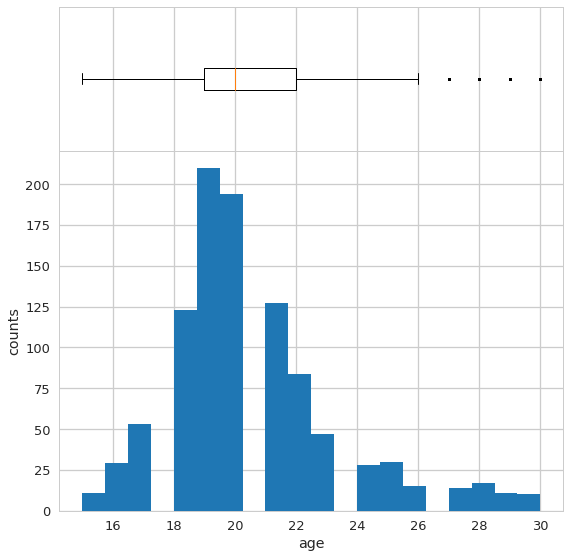

In [14]:
var_of_int='age'
box_on_hist(pd_rpns[var_of_int].dropna(),bins_def,var_of_int,'counts',(10,10),False);

*Vemos que en el caso del **peso** la ubicacion del boxplot as mas asimetrica (se acerca mas a uno de los bordes), esto esta marcando la existencia de outliers. Esto es menos marcado para el caso de la **edad**,el boxplot parece ser menos asimetrico.*
*En lo que sigue deberemos decidir si elegimos seguir con el set completo o quitamos los outliers.*

Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones.

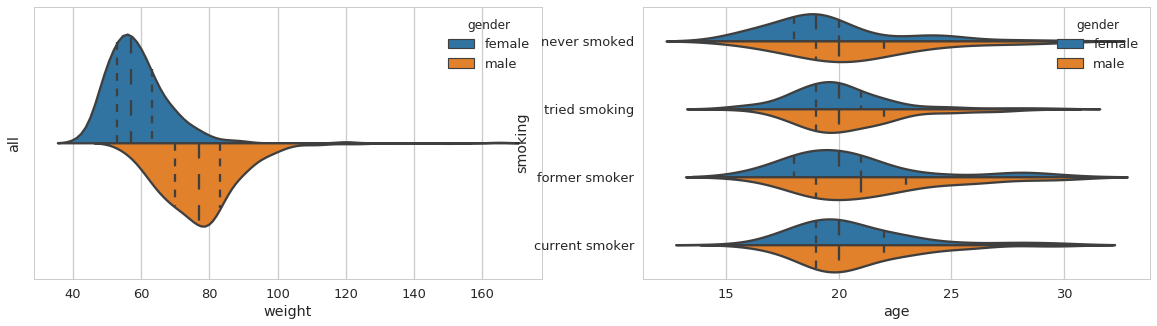

In [15]:
# Seguimos lo propuesto en el analisis original
pd_rpns["all"] = ""
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
data = pd_rpns.dropna(subset=['weight'])
_ = sns.violinplot(x='weight', y = "all", hue='gender', data=data, split=True, ax = ax[0],inner='quartile')
data = pd_rpns.dropna(subset=['age'])
_ = sns.violinplot(x='age', y = "smoking", hue='gender', data=data, split=True, ax = ax[1],inner='quartile')

*Vemos que el desglose en genero limpio un poco la distribucion de pesos (no en forma tan notoria en la de edades). Tambien observamos que la presencia de valores extremos (outliers - para el conjunto central de datos) distorsiona la distribucion. Vamos a removerlos del dataset*

In [16]:
print(pd_rpns[pd_rpns['weight']>110][['age', 'weight', 'gender']])
iList=pd_rpns[pd_rpns['weight']>110][['age', 'weight', 'gender']].index.values
display(iList)
pd_rpns_woo=pd_rpns.drop(iList)

      age  weight  gender
292  21.0   120.0  female
715  29.0   111.0    male
793  24.0   120.0    male
796  27.0   113.0    male
859  20.0   125.0    male
885  23.0   165.0  female
973  20.0   120.0  female
992  30.0   150.0    male


array([292, 715, 793, 796, 859, 885, 973, 992])

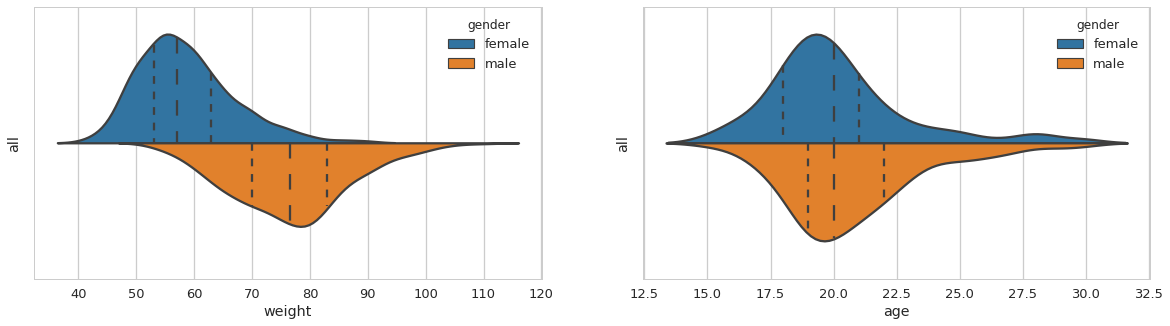

In [17]:
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
data = pd_rpns_woo.dropna(subset=['weight'])
_ = sns.violinplot(x='weight', y = "all", hue='gender', data=data, split=True, ax = ax[0],inner='quartile')
data = pd_rpns_woo.dropna(subset=['age'])
_ = sns.violinplot(x='age', y = "all", hue='gender', data=data, split=True, ax = ax[1],inner='quartile')

### Peso - Genero Masculino

gamma
(50.577848753749095, 5.2972876623623595, 1.4078833451674795)
rayleigh
(52.834444292171995, 18.170397046488254)
norm
(76.505, 10.001748597120406)


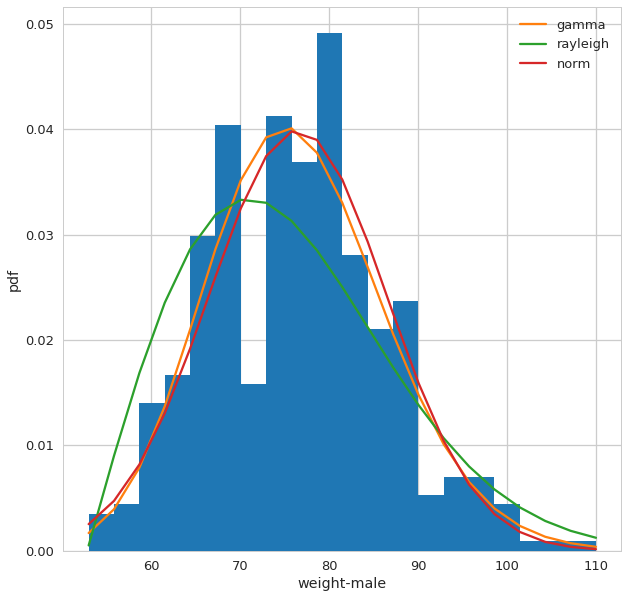

In [18]:
# Veamos las distribuciones desglosadas
def dist_filt(pd_in,var_of_int,var_to_filt,var_to_filt_val):
    y=pd_in.dropna(subset=[var_of_int])
    y[var_of_int][y[var_to_filt]==var_to_filt_val]
    pd_filt=y[var_of_int][y[var_to_filt]==var_to_filt_val];
    return pd_filt

var_of_int='weight'; var_to_filt='gender'; var_to_filt_val='male';
weight_male=dist_filt(pd_rpns_woo,var_of_int,var_to_filt,var_to_filt_val)
plt_hist(weight_male,bins_def,var_of_int+'-'+var_to_filt_val,'pdf',(10,10),['gamma', 'rayleigh','norm']);

*La distribucion de pesos, una vez removido los outliers, disminuye su asimetria y la distribucion **normal** parece ingresar en el grupo distribuciones representativas en el caso de considerar el genero masculino.*

In [19]:
# weight - male Stats
series_describe(weight_male)

nobs            400
valid           400
mode         [80.0]
mean         76.505
median         76.5
min              53
max             110
std         10.0143
10%              64
25%              70
50%            76.5
75%              83
90%              90
skew       0.240154
kurt     -0.0516836
dtype: object

### Peso -  Genero Femenino

gamma
(6.538791025832647, 37.65439973046316, 3.1984611423008564)
rayleigh
(40.909917841939766, 13.779146235045012)
norm
(58.5684575389948, 8.240486971275443)


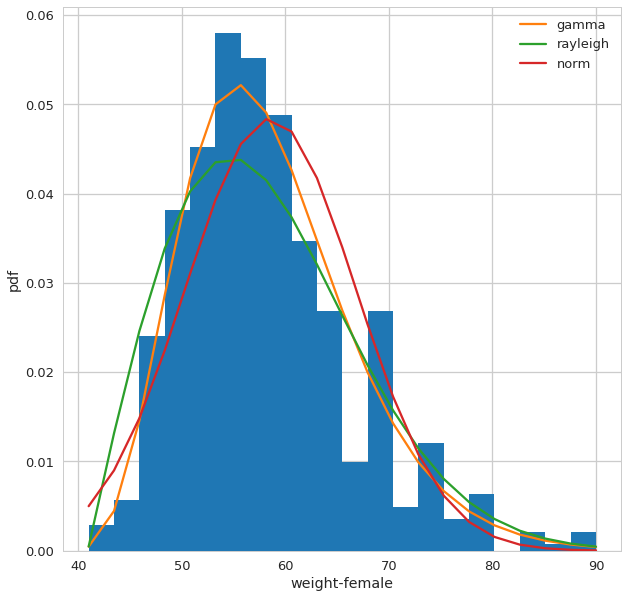

In [20]:
# Veamos las distribuciones desglosadas
var_of_int='weight'; var_to_filt='gender'; var_to_filt_val='female';
weight_female=dist_filt(pd_rpns_woo,var_of_int,var_to_filt,var_to_filt_val)
plt_hist(weight_female,bins_def,var_of_int+'-'+var_to_filt_val,'pdf',(10,10),['gamma', 'rayleigh','norm']);

*La distribucion de pesos en el caso femenino mantiene una forma en la pdf compatible con una distribucion **gamma**.*

In [21]:
# weight - female Stats
series_describe(weight_female)

nobs           577
valid          577
mode        [60.0]
mean       58.5685
median          57
min             41
max             90
std        8.24764
10%             49
25%             53
50%             57
75%             63
90%             70
skew      0.847333
kurt      0.890646
dtype: object

### Edad -  Genero Masculino

gamma
(7.909000188791767, 13.32484771256589, 0.9463347568879144)
rayleigh
(14.897550000622322, 4.602026651052107)
norm
(20.809405940594058, 2.721533246434785)


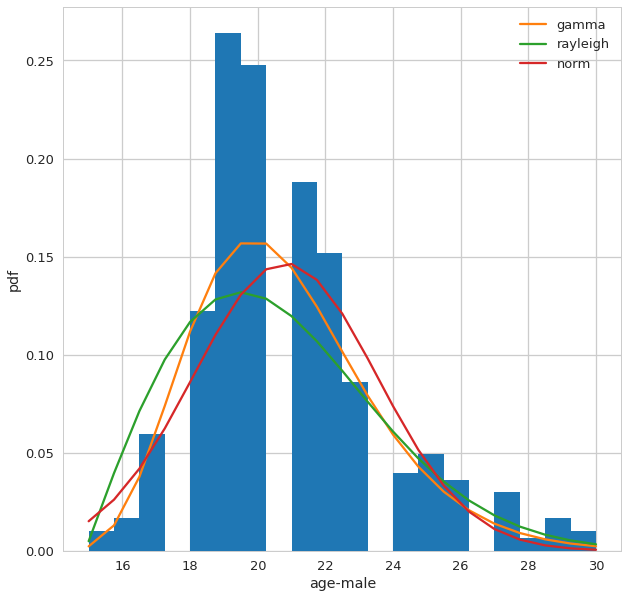

In [22]:
# Veamos las distribuciones desglosadas
var_of_int='age'; var_to_filt='gender'; var_to_filt_val='male';
age_male=dist_filt(pd_rpns_woo,var_of_int,var_to_filt,var_to_filt_val);
plt_hist(age_male,bins_def,var_of_int+'-'+var_to_filt_val,'pdf',(10,10),['gamma', 'rayleigh','norm']);

*Podemos ver que el desglose parece diferenciar la distribucion **gamma** como consistente (en forma funcional) con el set de datos.*

In [23]:
# age - male Stats
series_describe(age_male)

nobs           404
valid          404
mode        [19.0]
mean       20.8094
median          20
min             15
max             30
std        2.72491
10%             18
25%             19
50%             20
75%             22
90%             25
skew      0.969349
kurt        1.0933
dtype: object

### Edad -  Genero Femenino

gamma
(5.65970171437867, 13.718939049372231, 1.1287819341202656)
rayleigh
(14.764950891592417, 4.263359811540927)
norm
(20.107508532423207, 2.7945055068981692)


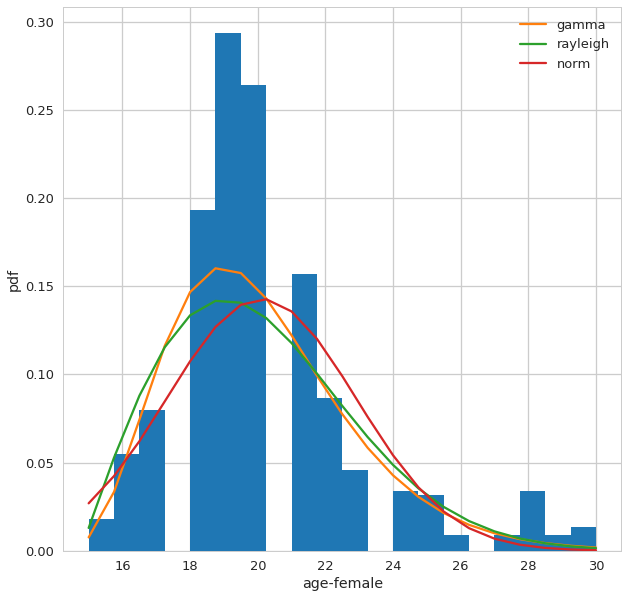

In [24]:
# Veamos las distribuciones desglosadas
var_of_int='age'; var_to_filt='gender'; var_to_filt_val='female';
age_female=dist_filt(pd_rpns_woo,var_of_int,var_to_filt,var_to_filt_val);
plt_hist(age_female,bins_def,var_of_int+'-'+var_to_filt_val,'pdf',(10,10),['gamma', 'rayleigh','norm']);

*Podemos ver que el desglose parece diferenciar la distribucion **beta** y **gamma** como consistente con el set de datos.*

In [25]:
# age - female Stats
series_describe(age_female)

nobs          586
valid         586
mode       [19.0]
mean      20.1075
median         20
min            15
max            30
std       2.79689
10%            17
25%            18
50%            20
75%            21
90%            24
skew      1.30832
kurt      2.21511
dtype: object

Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

Por todas estas variables entendemos: peso, edad, genero

In [26]:
# Para el calculo de las correlaciones utilizamos las funciones provistas por
# https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood
import copy
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

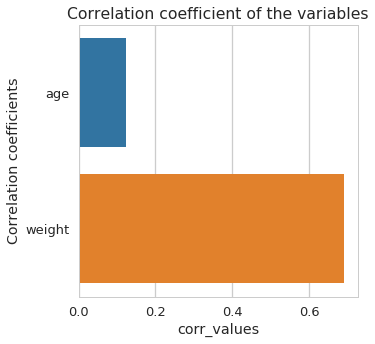

In [27]:
corrs_dfs_gender = correlation_plot('gender', pd_rpns_woo[['weight', 'age' ,'gender']], {'gender': {'female':0, 'male': 1}}, figsize=(5,5))

In [28]:
corrs_dfs_gender

[   corr_values features
 1     0.122630      age
 0     0.691192   weight, 0]

In [29]:
# Probemos una alternativa para entender el problema
# mappeamos gender
# {'gender': {'female':0, 'male': 1}}
def genmap(x):
    if x=='female':
        return 0
    elif x=='male':
        return 1
    else:
        return np.nan
var_of_int='gender'
var_of_int_num=var_of_int+'_num'
pd_rpns[var_of_int_num] = pd_rpns[var_of_int].apply(genmap)

In [30]:
corr = pd_rpns[['age','weight',var_of_int_num]].corr()
display(corr)
# Los numeros son similares mas no iguales, deberia tener con el hecho que en el metodo anterior se realiza un
# fillna + outliers no considerados, etc

,age,weight,gender_num
age,1.000000,0.237722,0.132559
weight,0.237722,1.000000,0.644937
gender_num,0.132559,0.644937,1.000000


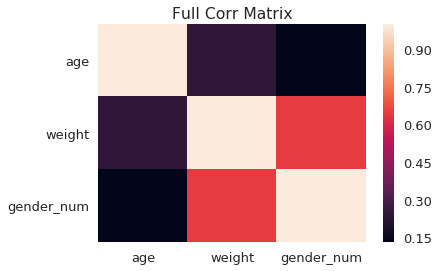

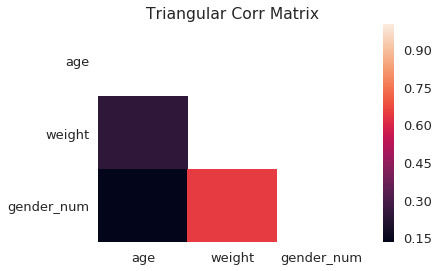

In [31]:
#Veamos el grafico
ax = sns.heatmap(corr)
plt.title('Full Corr Matrix')
plt.show()
# En el caso anterior tenemos informacion redundada la matriz de correlacion es simetrica.
# Por eso en los ejemplos hacen matrices triangulares
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask)
plt.title('Triangular Corr Matrix')
plt.show()

Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

In [32]:
def get_pd_unique_vals(pd_to_proc,colNames,pd_dropna_flag,lst_drop_npnan_flag):
    aux={};
    if pd_dropna_flag:
        pd_in= copy.deepcopy(pd_to_proc.dropna());
    else:
        pd_in=copy.deepcopy(pd_to_proc);
            
    for c in colNames:
        l=list(set(pd_in[c].values.tolist()))
        if lst_drop_npnan_flag:
            if np.nan in l:
                l.pop(l.index(np.nan))
        l.sort()
        aux[c]=l;
    return pd_in,aux
#
def pd_twoVars(pd_to_proc,val_first,val_sec):
    auxDict={}
    pd_in,lstDict=get_pd_unique_vals(pd_to_proc,[val_sec],True,True)
    pList=lstDict[val_sec];
    for i in range(0,len(pList)):
        s_i=pd_in[val_first][pd_in[val_sec]==pList[i]].value_counts()
        pd_i=s_i.to_frame()
        auxDict[pList[i]]=pd_i
        pd_int=pd.concat(auxDict.values(),axis=1)
    pd_int.columns=pList[:]
    pd_out=pd.DataFrame(data=pd_int.values,columns=pList[:],index=pd_int.index)
    return pd_out,pd_in

In [33]:
#Veamos un poco los valores de las variables de interes
pd_rpns['alcohol'] = pd_rpns['alcohol'].apply(lambda x: 'never drink' if x=='never' else x )
# actualizamos la definicion de never en alcohol para hacerlo mas claro
_,lst=get_pd_unique_vals(pd_rpns,['alcohol','smoking'],True,True)
display(lst)

{'alcohol': ['drink a lot', 'never drink', 'social drinker'],
 'smoking': ['current smoker',
  'former smoker',
  'never smoked',
  'tried smoking']}

In [34]:
pd_out,pd_proc=pd_twoVars(pd_rpns,'alcohol','smoking')
display(pd_out)

,current smoker,former smoker,never smoked,tried smoking
drink a lot,48,42,12,51
never drink,8,6,37,22
social drinker,62,67,96,223


Entonces en función de las cuentas podemos calcular las marginales para cada caso

In [35]:
pd_alcohol=pd.DataFrame(pd_out.sum(axis=1)/sum(pd_out.sum()),columns=['marginal'])
display(pd_alcohol)

,marginal
drink a lot,0.227003
never drink,0.108309
social drinker,0.664688


In [36]:
pd_smoking=pd.DataFrame(pd_out.sum(axis=0)/sum(pd_out.sum()),columns=['marginal'])
display(pd_smoking)

,marginal
current smoker,0.175074
former smoker,0.170623
never smoked,0.215134
tried smoking,0.439169


In [37]:
# Para la P (alcohol intersection smoking)
pd_int=pd.DataFrame(np.true_divide(pd_out.values,sum(pd_out.sum())),index=pd_out.index,columns=pd_out.columns)
display(pd_int)

,current smoker,former smoker,never smoked,tried smoking
drink a lot,0.071217,0.062315,0.017804,0.075668
never drink,0.011869,0.008902,0.054896,0.032641
social drinker,0.091988,0.099407,0.142433,0.330861


In [38]:
# Construyamos entonces la P condicional: P(alcohol|smoking)
# recordemos que P(A|B)=P(A int B)/P(B)
smoke_marginal_mat=np.repeat(pd_smoking.values.reshape(1,4),3).reshape(4,3).T
pd_alcohol_smoking=pd.DataFrame(np.divide(pd_int,smoke_marginal_mat))
display(pd_alcohol_smoking)

,current smoker,former smoker,never smoked,tried smoking
drink a lot,0.406780,0.365217,0.082759,0.172297
never drink,0.067797,0.052174,0.255172,0.074324
social drinker,0.525424,0.582609,0.662069,0.753378


In [39]:
# Construyamos entonces la P condicional: P(smoking|alcohol)
# recordemos que P(A|B)=P(A int B)/P(B)
alcohol_marginal_mat=np.repeat(pd_alcohol.values,4).reshape(3,4)
pd_smoking_alcohol=pd.DataFrame(np.true_divide(pd_int,alcohol_marginal_mat))
display(pd_smoking_alcohol)

,current smoker,former smoker,never smoked,tried smoking
drink a lot,0.313725,0.274510,0.078431,0.333333
never drink,0.109589,0.082192,0.506849,0.301370
social drinker,0.138393,0.149554,0.214286,0.497768


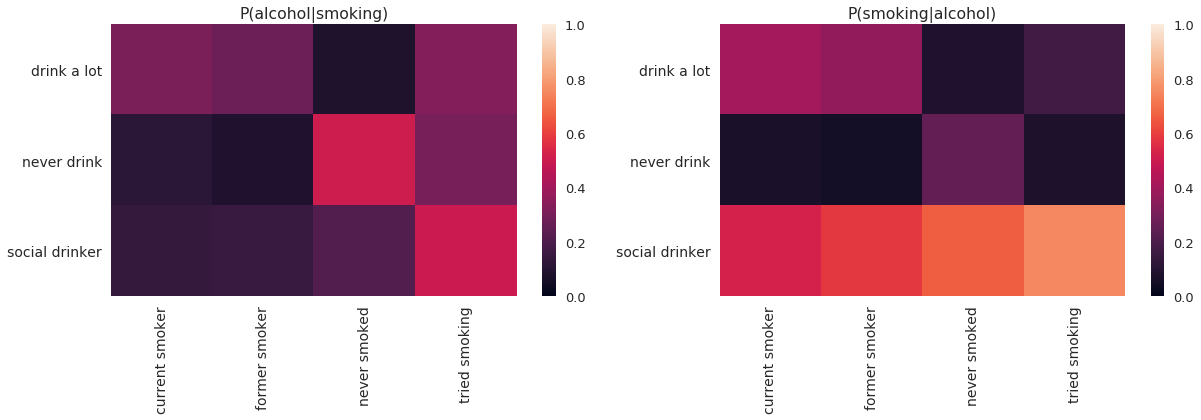

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
#NOTA: llevamos los dos a la misma escala via vmin y vmax, esto para tener una base comparativa entre las P
sns.heatmap(pd_smoking_alcohol,ax=ax[0],vmin=0,vmax=1);
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90,fontsize=14);
ax[0].set_yticklabels(ax[0].get_yticklabels(),rotation=0,fontsize=14);
ax[0].set_title('P(alcohol|smoking)');
sns.heatmap(pd_alcohol_smoking,ax=ax[1],vmin=0,vmax=1);
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90,fontsize=14);
ax[1].set_yticklabels(ax[1].get_yticklabels(),rotation=0,fontsize=14);
ax[1].set_title('P(smoking|alcohol)');

Nos falta calcular la correlacion entre las variables usadas. Usamos un esquema similar al ya usado en puntos anteriores o intentamos usar mejor alguna funcionalidad de pandas

In [41]:
pd_to_proc,lst=get_pd_unique_vals(pd_rpns,['alcohol','smoking'],True,True)
# Lo definimos categoricos y lo mapeamos
# https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
def pdcol_to_cat(pd_to_proc,col_lst,catcodesFlag,strSufix_aftercatcodes):
    for i in col_lst:
        pd_to_proc[i] = pd.Categorical(pd_to_proc[i])
        if catcodesFlag:
            pd_to_proc[i+strSufix_aftercatcodes]=pd_to_proc[i].cat.codes
    return pd_to_proc    

In [42]:
pd_to_proc=pdcol_to_cat(pd_to_proc,['smoking','alcohol'],True,'_num')

In [43]:
corr = pd_to_proc[['smoking_num','alcohol_num']].corr()
display(corr)

,smoking_num,alcohol_num
smoking_num,1.000000,0.222211
alcohol_num,0.222211,1.000000


Esta forma de la correlacion no estaria resultando muy ilustrativa (esta enmascarando toda la clasificacion basicamente). Veamos alguna alternativa.

In [44]:
# Buscamos construir un data frame que tenga como columnas los valores distintos de una dada categoria
# Usemos la lista que construimos con antelacion y el data frame
#pd_out,lst
def pd_cat_to_col(pd_to_prc,lst_in):
    pd_in=copy.deepcopy(pd_to_proc);
    dicAux={};
    for key in lst_in.keys():
        lst_aux=lst_in[key]
        colLst=[];
        for  l in lst_aux:
            mapgen=lambda x: 1 if x==l else 0
            #build name
            colName=key+'_'+l
            colLst.append(colName)
            pd_in[colName]=pd_in[key].apply(mapgen)
        dicAux[key]=colLst;
    return pd_in,dicAux

,smoking_current smoker,smoking_former smoker,smoking_never smoked,smoking_tried smoking,alcohol_drink a lot,alcohol_never drink,alcohol_social drinker
smoking_current smoker,1.000000,-0.208952,-0.241190,-0.407665,0.197712,-0.060055,-0.135897
smoking_former smoker,-0.208952,1.000000,-0.237465,-0.401368,0.149655,-0.081929,-0.078858
smoking_never smoked,-0.241190,-0.237465,1.000000,-0.463293,-0.180281,0.247419,-0.002905
smoking_tried smoking,-0.407665,-0.401368,-0.463293,1.000000,-0.115565,-0.096770,0.166242
alcohol_drink a lot,0.197712,0.149655,-0.180281,-0.115565,1.000000,-0.188865,-0.762977
alcohol_never drink,-0.060055,-0.081929,0.247419,-0.096770,-0.188865,1.000000,-0.490692
alcohol_social drinker,-0.135897,-0.078858,-0.002905,0.166242,-0.762977,-0.490692,1.000000


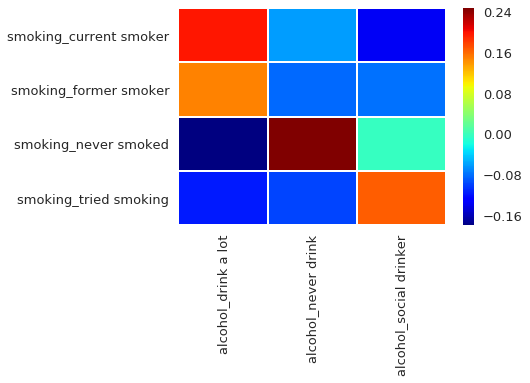

In [45]:
# Entonces armamos el set
pd_desglosado,lst_desglose=pd_cat_to_col(pd_out,lst)
col=[]
col.extend(lst_desglose['smoking'])
col.extend(lst_desglose['alcohol'])
corr = pd_desglosado[col].corr()
display(corr)
#De este set solo nos interesa un sector
filt=corr.loc[lst_desglose['smoking'],lst_desglose['alcohol']]
sns.heatmap(filt,cmap='jet',linewidths=1);

Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

*La primera pregunta es dificil de responder en terminos de los datos analizados. Podriamos arguir sin recurrir a ninguna fuente extra que seria "plausible" que el nivel de exposición de un individuo al tabaco en los lugares prohibidos baje (siempre y cuandos se respete la prohibición). Sin embargo no dice que cambie el estado de tabaquismo de una persona (por esto entendemos que deje de fumar, empiece o continue fumando). 
En relacion a estos puntos un par de referencias apuntan a que al menos en la region analizada ([1]) el nivel de concentracion baja. Y en un estudio que busca correlacionar la prohibicion de fumar en ciertos lugares con un cambio en el estado de tabaquismo de una persona ([2]) se observa alguna modificacion pero no es concluyente.*

*La segunda pregunta podemos intentar responderla con el ultimo heatmap. Las correlaciones observadas no parecen ser "intensas" (en el sentido de que no estan cercanas -en modulo- a la unidad) pero podemos usar su signo para indicar un sentido de cambio. Del grafico mencionado podemos arguir que:
-la cantidad de consumidores de alcohol dado que disminuye la cantidad de fumadores  de fumadores que consumen alcohol deberia acompañar el cambio para aquellos que consumen una cantidad importante (celda=(1,1))
-la cantidad de consumidores de alcohol dado que disminuye la cantidad de fumadores que consumen alcohol podria tener un cambio opuesto para aquellos que consumen solo socialmente (celda=(1,3))*



# Anexo - Laboratorio 2

En las lineas siguientes, y basados en los resultados del laboratorio 1, elaboramos los resultados para el laboratorio 2.

Pretendemos responder (y comunicar) preguntas tales como :
-La distribución de fumadores respecto de fumadoras.
-La distribución de consumidores de alcohol respecto de las consumidoras
-La distribución etaria y por genero de los que empiezan o dejan de consumir alcohol y cigarrillos? Existe una edad en la que se da mas un hecho que otro?
-Como es la distribución en el caso de los consumidores sociales, son mas proclives a una edad? Se diferencian por genero?

In [46]:
# export
plt_flag=True;
def plt_exp(plt_flag,plt_name,plt_ext):
    if plt_flag:
        plt.tight_layout()
        plt.savefig(plt_name+'.'+plt_ext)        

## Smoking

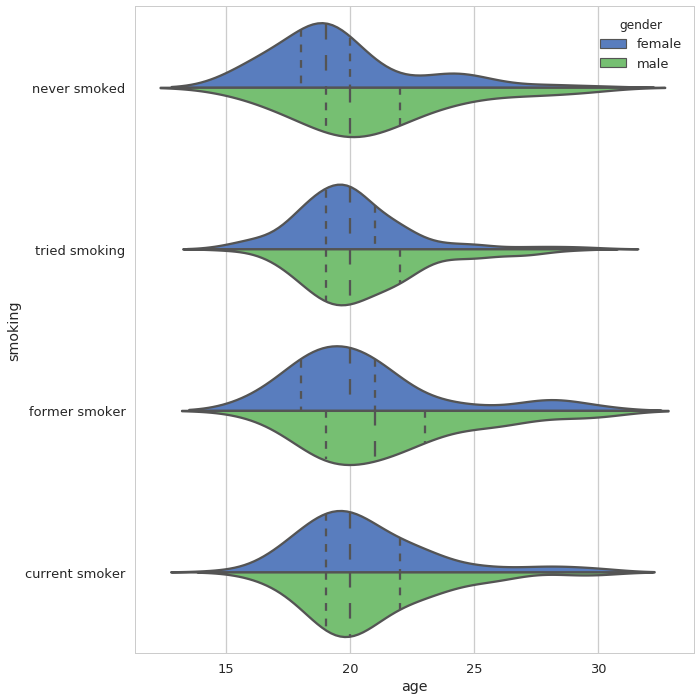

In [47]:
# Empecemos
data = pd_rpns.dropna(subset=['age'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
_ = sns.violinplot(x='age', y = "smoking", hue='gender', data=data, split=True, ax = ax,inner='quartile',palette=sns.color_palette("muted",n_colors=2))
plt_exp(plt_flag,'smoking_dist','png')

*En funcion de la grafica podemos realizar algunos comentarios:
- never smoked: parece existir un diferencia entre generos, no en forma funcional para la distribucino sino en su localizacion. Esto puede verse revisando los quartiles (en la misma figura) los cuales vemos desplazados para el caso en consideracion. Esto podria indicar que el genero femenino comienza (al menos para el set en consideracion) a fumar con antelacion respecto al genero masculino (esto soportado por el dato que la probabilidad de encontrar mujeres que no hallan fumado mas alla de los 20 es menor que la de los hombres). Asimismo pasan a ser "former smoker" antes que el genero masculino. Lo cual es razonable teniendo en cuenta el comentario anterior.
- tried smoking: muestra una paridad entre generos respecto a su distribucion (aunque el genero masculino tiende a tener mas intentos a edades mayores, aunque el nucleo de la distrubucion es esencialmente el mismo).
- former smoker: en forma similar a "never smoked" la forma funcional del nucleo de la distribucion parece estar desplazado pero no su forma.
- current smoker: muestra una paridad entre generos, es decir no se observan diferencias evidentes para la situacion de fumadores.

In [48]:
# Veamos las distribuciones desglosadas
from matplotlib.gridspec import GridSpec

def pd_filt_two(pd_in,var_of_int,var_to_filt_pair_1,var_to_filt_pair_2):
    y=pd_in.dropna(subset=[var_of_int])
    pd_filt=y[(y[var_to_filt_pair_1[0]]==var_to_filt_pair_1[1]) & (y[var_to_filt_pair_2[0]]==var_to_filt_pair_2[1])];
    return pd_filt

def getSurvival(pd_in,var_of_int):
    s_y_norm=pd_in[var_of_int].value_counts(normalize=True) # por default dropnan=True!
    pd_y_norm=s_y_norm.to_frame().reset_index().sort_values(['index'])
    pd_y_norm.reset_index(inplace=True,drop=True)
    pd_y_norm.columns=[var_of_int,'pFreq']
    pd_y_norm.reset_index(drop=True,inplace=True)
    pd_y_norm['pFDA']=pd_y_norm.pFreq.cumsum();
    pd_y_norm['pSurvival']=1-pd_y_norm.pFreq.cumsum();
    return pd_y_norm
def buildSurvival_dict(pd_in,var_of_int,var_filt_1,var_filt_2):
    aux={}
    _,lst=get_pd_unique_vals(pd_in,[var_filt_1,var_filt_2],True,True)
    for x in lst[var_filt_1]:
        val_filt_pair_1=[var_filt_1,x];
        for y in lst[var_filt_2]:
            val_filt_pair_2=[var_filt_2,y];
            a=pd_filt_two(pd_in,var_of_int,val_filt_pair_1,val_filt_pair_2)
            aux[x+'_'+y]=getSurvival(a,var_of_int)
    return aux,lst


def build_plt_grid(ncol,nrow,order):
    ax=list(range(0,ncol*nrow))
    col=list(range(0,ncol))
    row=list(range(0,nrow))
    gs=GridSpec(nrow,ncol)
    k=-1
    if order==0:
        # row order
        for j in col:
            for i in row:
                k=k+1
                ax[k]=plt.subplot(gs[i,j])
    else:
         for j in row:
            for i in col:
                k=k+1
                ax[k]=plt.subplot(gs[j,i])
                
    return ax             

def plt_Survival_dict(dict_survival,dict_lst,var_of_int,var_filt_1,var_filt_2,val_req,ax):
    j=-1
    for x in lst[var_filt_1]:
        j=j+1
        legendaux=[]
        for y in lst[var_filt_2]:
            ax[j].plot(a[y+'_'+x][var_of_int],a[y+'_'+x][val_req])
            legendaux.append(y+'_'+x)
        ax[j].legend(legendaux)
        ax[j].set_xlabel(var_of_int)
        ax[j].set_ylabel(val_req)

    

A los comentarios anteriores les podemos dar soporte extra considerando, dado un evento, su probabilidad de supervivencia, la cual no es mas que $$\Phi(t)=1-FDA(t)$$. Para FDA funcion de densidad acumulada.

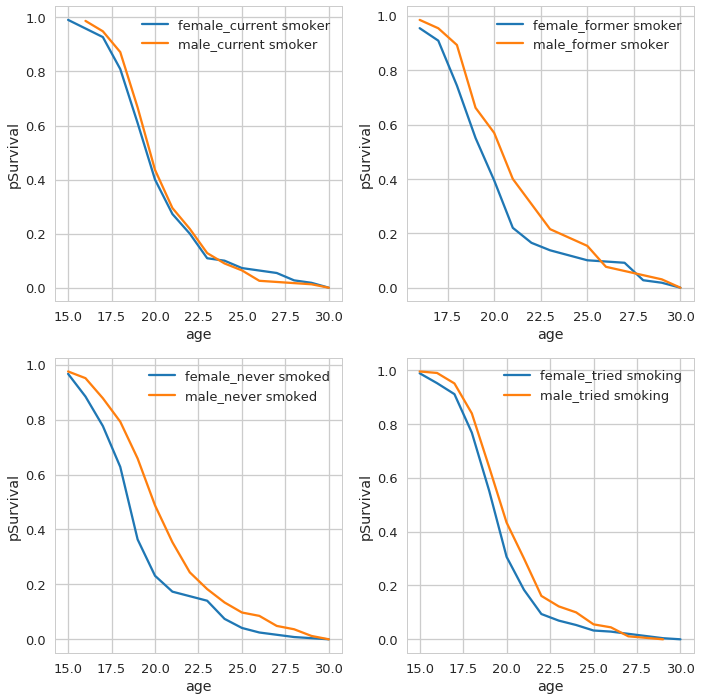

In [49]:
# Buscamos graficar \Phi
var_of_int='age'
var_filt_1='gender'
var_filt_2='smoking'
a,lst=buildSurvival_dict(pd_rpns,var_of_int,var_filt_1,var_filt_2)
fig = plt.figure(figsize=(10,10))
ax=build_plt_grid(2,2,1)
plt_Survival_dict(a,lst,var_of_int,var_filt_2,var_filt_1,'pSurvival',ax)
plt_exp(plt_flag,'smoking_survival','png')

A partir de las imagenes anteriores vemos que se da soporte a las suposiciones en cuanto a diferencias o en similitudes. 
Y en virtud de estas podriamos generar ciertos indicativos, en este caso como que el enfoque respecto a los grupos de consumo deberia empezar en forma mas temprana para el genero femenino.

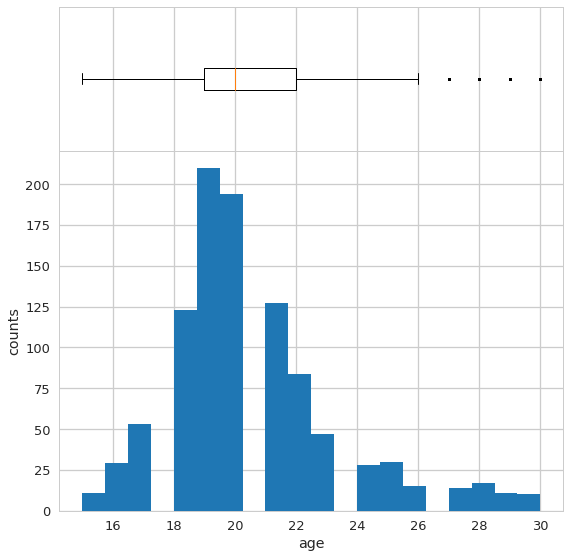

In [50]:
# Esto se altera por Outliers?
# Recordemos primeroa la distribucion de edades independiente de genero
var_of_int='age'
box_on_hist(pd_rpns[var_of_int].dropna(),bins_def,var_of_int,'counts',(10,10),False);
plt.show()
plt_exp(plt_flag,'age_outliers','png')
# De acuerdo al box plot observamos ciertos outliers en la distribucion

In [51]:
# Veamos si al analizar los outliers generamos asimetrias en cuanto al genero
pd_rpns_filt=pd_rpns[pd_rpns['age']>=27][['age', 'gender']].dropna()
gf=pd_rpns_filt['gender'][pd_rpns_filt['gender']=='female'].count()
gm=pd_rpns_filt['gender'][pd_rpns_filt['gender']=='male'].count()

print('Femeninos (outliers): ' + str(gf) + ' sobre ' + str(pd_rpns['gender'][pd_rpns['gender']=='female'].count()))
print('Masculinos  (outliers): ' + str(gm) + ' sobre ' + str(pd_rpns['gender'][pd_rpns['gender']=='male'].count()))

# Las diferencias no parece considerables (menos de un 5%).
iList=pd_rpns[pd_rpns['age']>=27][['age', 'gender']].index.values
pd_rpns_woo=pd_rpns.drop(iList)

Femeninos (outliers): 29 sobre 593
Masculinos  (outliers): 22 sobre 411


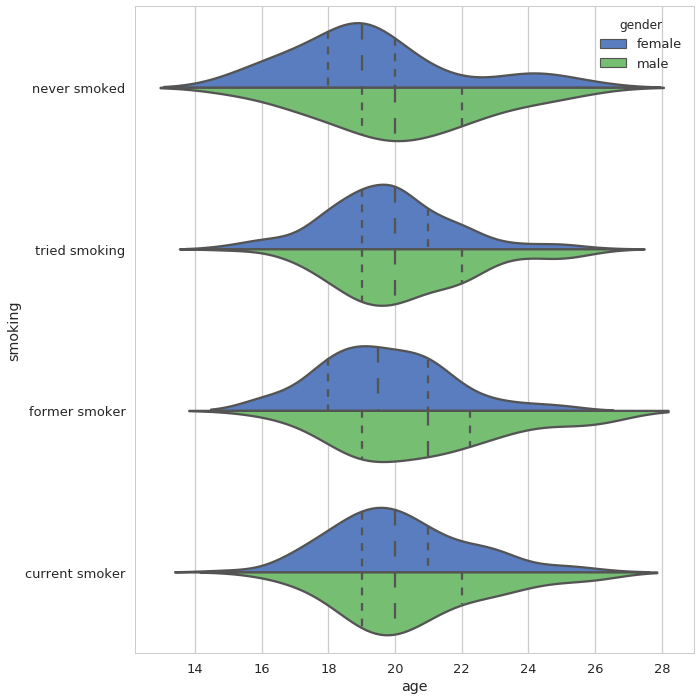

In [52]:
# Entonces sin Outliers
data = pd_rpns_woo.dropna(subset=['age'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
_ = sns.violinplot(x='age', y = "smoking", hue='gender', data=data, split=True, ax = ax,inner='quartile',palette=sns.color_palette("muted",n_colors=2))
plt_exp(plt_flag,'smoking_dist_woo','png')

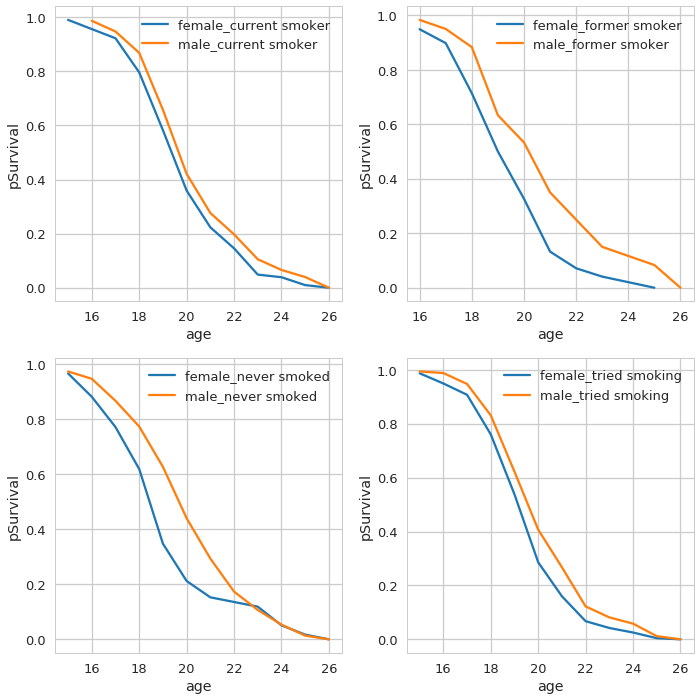

In [53]:
# Buscamos graficar \Phi
var_of_int='age'
var_filt_1='gender'
var_filt_2='smoking'
a,lst=buildSurvival_dict(pd_rpns_woo,var_of_int,var_filt_1,var_filt_2)
fig = plt.figure(figsize=(10,10))
ax=build_plt_grid(2,2,1)
plt_Survival_dict(a,lst,var_of_int,var_filt_2,var_filt_1,'pSurvival',ax)
plt_exp(plt_flag,'smoking_survival_woo','png')

Las consideraciones vertidas parecen mantenerse con la salvedad que en el caso de "Never smoked" la remocion de outliers genero que la Survival probability sea indiferente para Masculinos o femeninos a partir de una cierta edad (>22)

Sigamos con el analisis. Veamos ya sin tener la distribucion de edad en mente como se distribuye por genero el tabaquismo

In [54]:
pd_out,pd_proc=pd_twoVars(pd_rpns,'gender','smoking')
display(pd_out)
pd_out.to_latex(buf='ct_smoking_counts.txt')
# Tenemos un barplot a mano por si hace falta
#fig = plt.figure(figsize=(10,10))
#sns.barplot(x="age", y="smoking", hue="gender", data=data,palette="muted")
#plt.legend(loc='upper left')

,current smoker,former smoker,never smoked,tried smoking
female,70,70,86,176
male,48,45,59,120


Un primer vistazo a la tabla no arroja grandes diferencias por clase. Mejor veamos las cuentas normalizadas

,current smoker,former smoker,never smoked,tried smoking
female,0.174129,0.174129,0.213930,0.437811
male,0.176471,0.165441,0.216912,0.441176


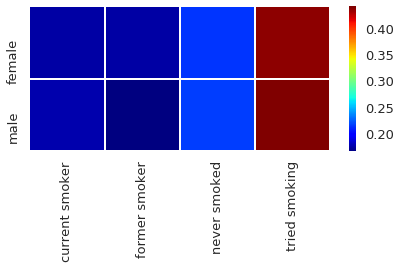

In [55]:
val=pd_out.sum(axis=1)
val_mat=np.repeat(val.values.reshape(2,1),4).reshape(2,4)
pd_out_norm=pd.DataFrame(np.divide(pd_out,val_mat))
display(pd_out_norm)
pd_out_norm.to_latex(buf='ct_smoking_freq.txt')
sns.heatmap(pd_out_norm,cmap='jet',linewidths=1)
plt_exp(plt_flag,'smoking_heatmap','png')

En este formato vemos que son similares las proporciones por clase (tanto numericamente como graficamente). Veamos que nos puede decir el test chi-cuadrado de Person respecto a esto. Es decir buscamos responder si las diferencias observadas en los grupos son relacionadas al azar o tienen una correlacion o de otra forma si la actitud respecto al tabaquismo se distribuye de la misma manera independiente del genero. 

In [56]:
import scipy.stats as scy_sts
scy_sts.chi2_contingency(pd_out.values)
## Return
#chi2 : float  The test statistic.
#p : float    The p-value of the test
#dof : int  Degrees of freedom
# expected : ndarray, same shape as observed The expected frequencies, based on the marginal sums of the table.


(0.08773839773570574,
 0.9932671218017434,
 3,
 array([[ 70.37982196,  68.59050445,  86.48367953, 176.54599407],
        [ 47.62017804,  46.40949555,  58.51632047, 119.45400593]]))

En relacion a esto recordemos que cuanto mayor sea el valor de $\chi^2$ , menos verosímil es que la hipótesis nula (que asume la igualdad entre ambas distribuciones) sea correcta. De la misma forma, cuanto más se aproxima a cero el valor de chi-cuadrado, más ajustadas están ambas distribuciones. En funcion de lo obtenido podemos decir que las distribuciones parecen tener un origen comun (es decir la actitud respecto al tabaquismo -sin diferenciar edad- parece tener un mismo comportamiento entre generos). La significancia estadistica la vemos en terminos del $p$-valor. El valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido si suponemos que la hipótesis nula es cierta.  En nuestro caso $p>0.99$ con lo cual NO podemos rechazar la hipotesis de los datos provengan de una misma distribucion y las diferencias solo sean debidas al azar.

## Alcohol

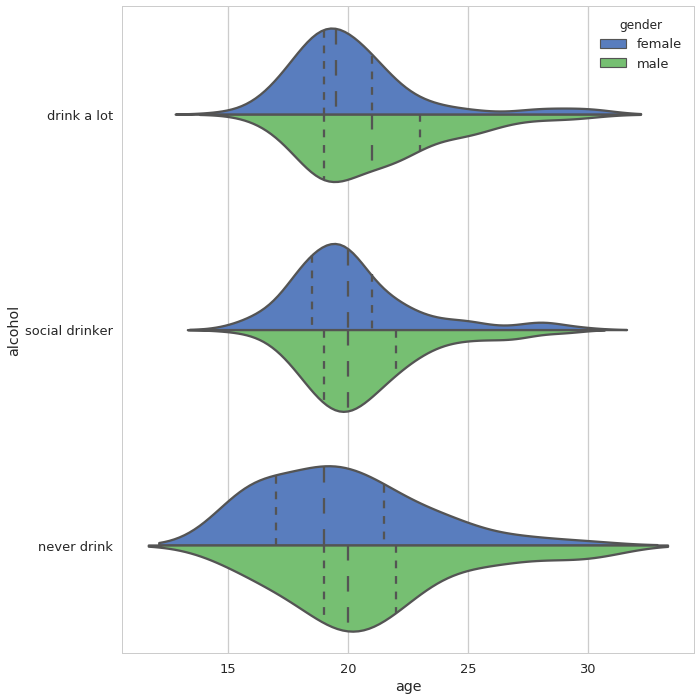

In [57]:
# Veamos el enfoque para el alcohol
data = pd_rpns.dropna(subset=['age'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
_ = sns.violinplot(x='age', y = "alcohol", hue='gender', data=data, split=True, ax = ax,inner='quartile',palette=sns.color_palette("muted",n_colors=2))
plt_exp(plt_flag,'alcohol_dist','png')

*En funcion de la grafica podemos realizar algunos comentarios:
- never drink: parece existir un diferencia entre generos, no en forma funcional para la distribucino sino en su localizacion. Esto puede verse revisando los quartiles (en la misma figura) los cuales vemos desplazados para el caso en consideracion. 
- social drinker: muestra una paridad entre generos respecto a su distribucion (aunque el genero masculino tiende a tener mas intentos a edades mayores, el nucleo de la distribucion es esencialmente el mismo).
- drink a lot: muestra una paridad entre generos, aunque la mediana para el genero masculino se encuentra en una edad mayor que en el caso femenino, constribuyendo esto a encontrar mas casos - para el genero masculino - a edades mayores.

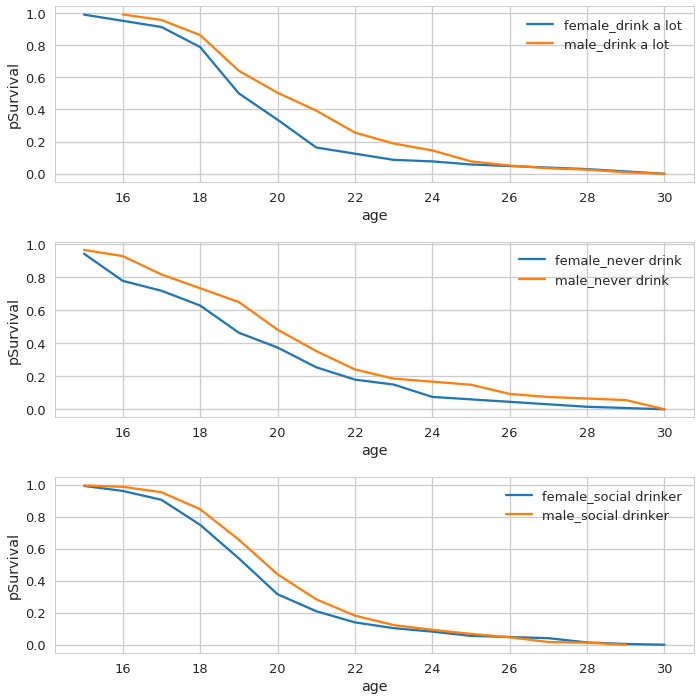

In [58]:
# Buscamos graficar \Phi
var_of_int='age'
var_filt_1='gender'
var_filt_2='alcohol'
a,lst=buildSurvival_dict(pd_rpns,var_of_int,var_filt_1,var_filt_2)
fig = plt.figure(figsize=(10,10))
ax=build_plt_grid(1,3,1)
plt_Survival_dict(a,lst,var_of_int,var_filt_2,var_filt_1,'pSurvival',ax)
plt_exp(plt_flag,'alcohol_survival','png')

A partir de las imagenes anteriores vemos que se da soporte a las suposiciones en cuanto a diferencias o en similitudes. 
Y en virtud de estas podriamos generar ciertos indicativos, en este caso como que el enfoque respecto a los grupos de consumo deberia atacar en forma decidida el consumo excesivo de alcohol en el genero masculino. Dicho de otra forma, entender las causas que mantienen el consumo excesivo en adultos masculinos mayores contribuiria a menguar su consumo.

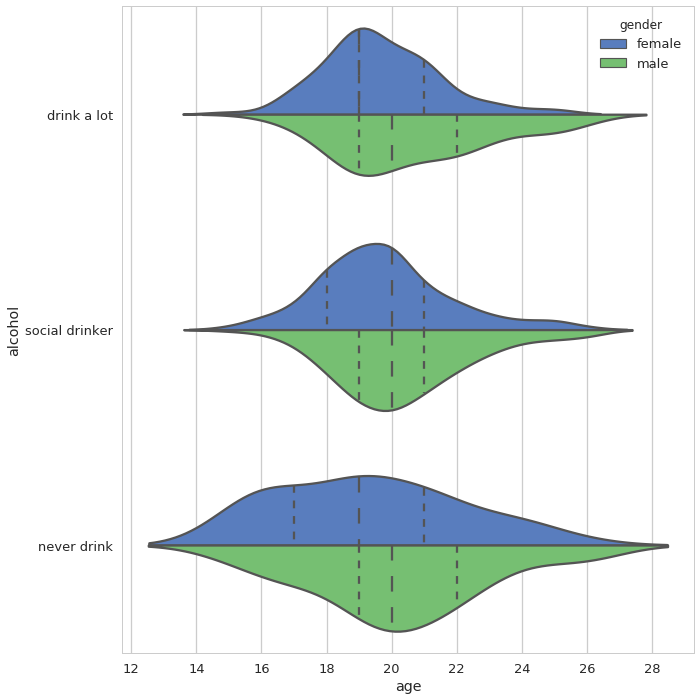

In [59]:
# En forma similar a lo realizado con el tabaquismo
# Entonces sin Outliers
data = pd_rpns_woo.dropna(subset=['age'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
_ = sns.violinplot(x='age', y = "alcohol", hue='gender', data=data, split=True, ax = ax,inner='quartile',palette=sns.color_palette("muted",n_colors=2))
plt_exp(plt_flag,'alcohol_dist_woo','png')

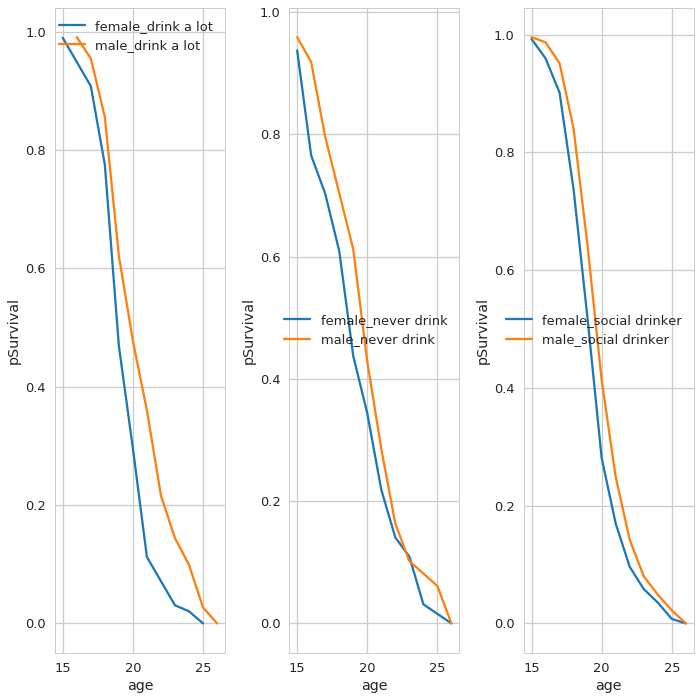

In [60]:
# Buscamos graficar \Phi
var_of_int='age'
var_filt_1='gender'
var_filt_2='alcohol'
a,lst=buildSurvival_dict(pd_rpns_woo,var_of_int,var_filt_1,var_filt_2)
fig = plt.figure(figsize=(10,10))
ax=build_plt_grid(3,1,1)
plt_Survival_dict(a,lst,var_of_int,var_filt_2,var_filt_1,'pSurvival',ax)
plt_exp(plt_flag,'alcohol_survival_woo','png')

La remocion de outliers no parece alterar en forma significativa ninguna de las distribuciones representadas. Esto con la salvedad que en el caso de grandes consumidores se marca mas definidamente la existencia de cierta asimetria en la permanencia de consumidores a edades mayores en el genero masculino sobre el genero femenino.

Sigamos con el analisis. Veamos ya sin tener la distribucion de edad en mente como se distribuye por genero el consumo de alcohol

In [61]:
pd_out,pd_proc=pd_twoVars(pd_rpns,'gender','alcohol')
display(pd_out)
pd_out.to_latex(buf='ct_alcohol_counts.txt')

,drink a lot,never drink,social drinker
female,74,40,288
male,79,33,160


Un primer vistazo a la tabla arroja cierta asimetria en una de las clasificaciones. Mejor veamos las cuentas normalizadas

,drink a lot,never drink,social drinker
female,0.184080,0.099502,0.716418
male,0.290441,0.121324,0.588235


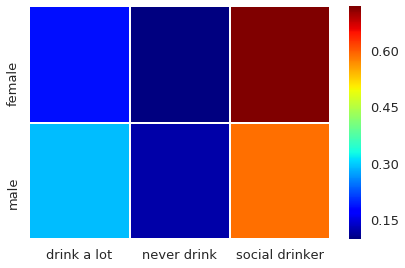

In [62]:
val=pd_out.sum(axis=1)
val_mat=np.repeat(val.values.reshape(2,1),3).reshape(2,3)
pd_out_norm=pd.DataFrame(np.divide(pd_out,val_mat))
display(pd_out_norm)
pd_out_norm.to_latex(buf='ct_alcohol_freq.txt')
sns.heatmap(pd_out_norm,cmap='jet',linewidths=1)
plt_exp(plt_flag,'alcohol_heatmap','png')

En este formato vemos que las proporciones por clase (tanto numericamente como graficamente) tienden a diferenciarse. Veamos que nos puede decir el test chi-cuadrado de Person respecto a esto. Es decir buscamos responder si las diferencias observadas en los grupos son relacionadas al azar o tienen una correlacion o de otra forma si la actitud respecto al alcohol se distribuye de la misma manera independiente del genero. 

In [63]:
scy_sts.chi2_contingency(pd_out.values)

(12.808373977060509,
 0.0016546148958979658,
 2,
 array([[ 91.25519288,  43.54005935, 267.20474777],
        [ 61.74480712,  29.45994065, 180.79525223]]))

En relacion a esto recordemos nuevamente que cuanto mayor sea el valor de $\chi^2$ , menos verosímil es que la hipótesis nula (que asume la igualdad entre ambas distribuciones) sea correcta. De la misma forma, cuanto más se aproxima a cero el valor de chi-cuadrado, más ajustadas están ambas distribuciones. En funcion de lo obtenido podemos decir que las distribuciones parecen tener un origen distinto (es decir la actitud respecto al consumo de alcohol -sin diferenciar edad- parece tener un comportamiento diferente entre generos). La significancia estadistica la vemos en terminos del $p$-valor. El valor p nos muestra la probabilidad de haber obtenido el resultado que hemos obtenido si suponemos que la hipótesis nula es cierta.  En nuestro caso $p<0.001 (p<0.16\%)$ con lo cual SI podemos rechazar la hipotesis de que los datos provengan de una misma distribucion.